# Quad patch

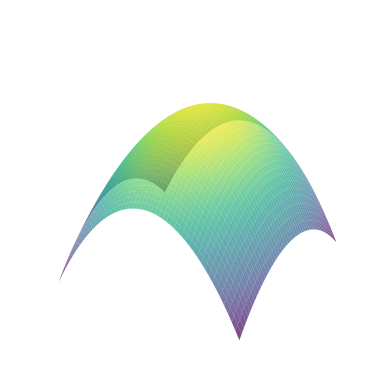

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import comb

def bernstein_poly(i, n, t):
    """Compute Bernstein polynomial B_{i,n}(t)."""
    return comb(n, i) * (t**i) * ((1 - t)**(n - i))

def bezier_patch_3d(control_points, resolution=50):
    """
    Create a tensor-product Bézier patch in 3D.
    :param control_points: A 3D array of shape (m, n, 3) defining control points.
    :param resolution: Number of points along each parametric direction.
    :return: x, y, z arrays for the patch surface.
    """
    m, n, _ = control_points.shape
    u = np.linspace(0, 1, resolution)
    v = np.linspace(0, 1, resolution)
    u, v = np.meshgrid(u, v)

    patch_x = np.zeros_like(u)
    patch_y = np.zeros_like(u)
    patch_z = np.zeros_like(u)

    for i in range(m):
        for j in range(n):
            bernstein_u = bernstein_poly(i, m - 1, u)
            bernstein_v = bernstein_poly(j, n - 1, v)
            patch_x += bernstein_u * bernstein_v * control_points[i, j, 0]
            patch_y += bernstein_u * bernstein_v * control_points[i, j, 1]
            patch_z += bernstein_u * bernstein_v * control_points[i, j, 2]

    return patch_x, patch_y, patch_z

# Define control points for a 3D Bézier patch
control_points = np.array([
    [[0, 0, 0], [1, 0, 2], [2, 0, 0]],
    [[0, 1, 1], [1, 1, 3], [2, 1, 1]],
    [[0, 2, 0], [1, 2, 2], [2, 2, 0]]
])

# Generate the Bézier patch
x, y, z = bezier_patch_3d(control_points)

# Plot the Bézier patch
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(x, y, z, rstride=1, cstride=1, alpha=0.7, cmap='viridis')

# Plot control points
control_x, control_y, control_z = control_points[:, :, 0], control_points[:, :, 1], control_points[:, :, 2]
#ax.plot_wireframe(control_x, control_y, control_z, color='red', linestyle='--', label='Control Grid')

# Remove axes, grid, and labels
ax.axis('off')

plt.show()


# Triangle

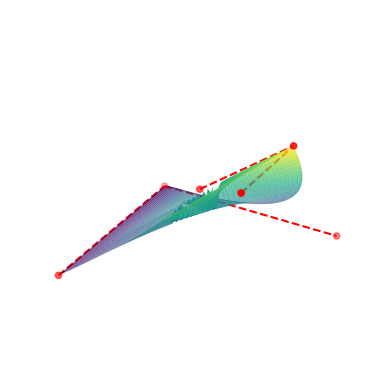

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def bernstein_poly(i, j, k, n, u, v, w):
    """Compute Bernstein polynomial B_{i,j,k}(u,v,w)."""
    from scipy.special import comb
    return comb(n, i) * comb(n - i, j) * (u**i) * (v**j) * (w**k)

def bezier_triangle_patch(control_points, resolution=50):
    """
    Create a Bézier triangle patch.
    :param control_points: A 2D array of shape ((n+1)*(n+2)//2, 3) defining control points.
    :param resolution: Number of points along each parametric direction.
    :return: x, y, z arrays for the patch surface.
    """
    n = int((np.sqrt(8 * len(control_points) + 1) - 3) / 2)  # Degree of the triangle
    u = np.linspace(0, 1, resolution)
    v = np.linspace(0, 1, resolution)
    u, v = np.meshgrid(u, v)
    w = 1 - u - v

    # Mask out invalid (u, v, w) combinations
    valid = (u + v <= 1)
    u = u[valid]
    v = v[valid]
    w = w[valid]

    x = np.zeros_like(u)
    y = np.zeros_like(u)
    z = np.zeros_like(u)

    idx = 0
    for i in range(n + 1):
        for j in range(n + 1 - i):
            k = n - i - j
            b = bernstein_poly(i, j, k, n, u, v, w)
            x += b * control_points[idx, 0]
            y += b * control_points[idx, 1]
            z += b * control_points[idx, 2]
            idx += 1

    return x, y, z

# Define control points for a Bézier triangle (degree 2, quadratic triangle)
control_points = np.array([
    [0, 0, 0],  # Vertex 1
    [1, 0, 1],  # Edge point
    [0, 1, 0],  # Vertex 2
    [0.5, 0.5, 0.5],  # Internal point
    [1, 1, 0],  # Vertex 3
    [1, 0.5, 1],  # Edge point
])

# Generate the Bézier triangle patch
x, y, z = bezier_triangle_patch(control_points)

# Plot the Bézier triangle patch
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(x, y, z, alpha=0.8, cmap='viridis')

# Plot control points
control_x, control_y, control_z = control_points[:, 0], control_points[:, 1], control_points[:, 2]
ax.scatter(control_x, control_y, control_z, color='red', label='Control Points')

# Connect control points to form the control net
for i in range(len(control_points)):
    for j in range(i + 1, len(control_points)):
        if np.sum(np.abs(control_points[i] - control_points[j])) <= 1.0:
            ax.plot([control_points[i, 0], control_points[j, 0]],
                    [control_points[i, 1], control_points[j, 1]],
                    [control_points[i, 2], control_points[j, 2]],
                    color='red', linestyle='--')

# Remove axes for clarity
ax.axis('off')

plt.show()



# PN triangle